<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h2 align="left"><font color=#4D869C>Problem:</font></h2>


The problem at hand involves predicting whether individuals have returned their loan or not based on a dataset containing various features about these individuals. Each record in the dataset represents a person, and the target variable indicates whether they have fulfilled their loan obligation or not. The task is to explore and test several machine learning and deep learning algorithms to determine which one yields the best performance in predicting loan repayment behavior. The evaluation criterion for comparing the algorithms is the F1 score, a metric that balances precision and recall, making it suitable for imbalanced classification problems like this one. The ultimate goal is to identify the algorithm that achieves the highest F1 score, indicating its effectiveness in accurately classifying loan repayment outcomes.
    
<h2 align="left"><font color=#4D869C>Team Members:</font></h2>

- **Morteza Rashidpour**
- **MohammadMilad Karimi**
- **MohammadHossein Noohpisheh**
- **Alireza Nasiri Kia**
- **Sajjad Hadadi**



<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left">

<h2 align="left"><font color=#4D869C>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective modeling. This involves:
  - Identifying and imputing or removing missing values.
  - Detecting and removing duplicate entries.
  - Identifying and treating outliers to avoid skewed results.
  - Converting data types where necessary to ensure consistency and accuracy.

- **Feature Engineering**: Explore and create new features from the existing dataset that might improve the predictive power of the models. This could involve:
  - Extracting meaningful information from the available features.
  - Creating new features through aggregation, polynomial transformations, or domain-specific knowledge.
  - Encoding categorical variables into numerical formats (e.g., one-hot encoding, label encoding).
  - Combining features in insightful ways to capture complex patterns.

- **Data Preprocessing**: Standardize, encode, or normalize features as necessary to prepare the data for model training. This step aims to ensure that the algorithms can effectively learn from the data and make accurate predictions. Key tasks include:
  - Standardizing features to have a mean of zero and a standard deviation of one.
  - Normalizing features to a specific range (e.g., 0 to 1).
  - Encoding categorical variables appropriately.
  - Splitting the dataset into training and testing sets to evaluate model performance.

- **Model Selection**: Test various machine learning and deep learning algorithms to identify the most effective model for the task. This process involves:
  - Experimenting with different machine learning models such as linear regression, decision trees, random forests, support vector machines, and gradient boosting machines.
  - Exploring deep learning models such as neural networks and convolutional neural networks if applicable.
  - Evaluating models based on F1 score to determine the best performing model.



<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left">

<h2 align="left"><font color=#4D869C>Table of Contents:</font></h2>
    
* [Step 1 | Setup and Initial Data Analysis](#initial_analysis)  
* [Step 2 | Data Cleaning & Transformation](#data_cleaning)
* [Step 3 | Exploratory Data Analysis](#eda)
* [Step 4 | Data Preprocessing](#preprocessing)
* [Step 5 | Model Selection](#modeling)
    - [Step 5.1 | Logistic Regression](#logistic)
    - [Step 5.2 | Decision Trees](#decisiontrees)
    - [Step 5.3 | Random Forest](#randomforest)
    - [Step 5.4 | Support Vector Machines](#svm)
    - [Step 5.5 | XGboost](#xgboost)
    - [Step 5.6 | Fully Connected Neural Networks](#nn)
* [Step 6 | Conclusions & Comparison of different models](#conclusions)

<a id="#initial_analysis"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px; padding: 15px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, Normalizer, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.utils import resample
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [19]:
data = pd.read_csv('/content/loan_data.csv')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [20]:
data.shape

(9578, 14)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [22]:
data.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [24]:
data.describe(include="object").T

,count,unique,top,freq
purpose,9578,7,debt_consolidation,3957


In [25]:
data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h2 align="left"><font color=#4D869C>1.1 Dataset Description:</font></h2>


| Variable Name      | Role          | Type          |
| :---               |    :----:     |          ---: |
| credit.policy      | Feature       | Binary        |
| purpose            | Feature       | Categorical   |
| int.rate           | Feature       | Continuous    |
| installment        | Feature       | Continuous    |
| log.annual.inc     | Feature       | Continuous    |
| dti                | Feature       | Continuous    |
| fico               | Feature       | Integer       |
| days.with.cr.line  | Feature       | Continuous    |
| revol.bal          | Feature       | Integer       |
| revol.util         | Feature       | Continuous    |
| inq.last.6mths     | Feature       | Binary        |
| delinq.2yrs        | Feature       | Binary        |
| pub.rec            | Feature       | Binary        |
| not.fully.paid     | Target        | Binary        |
    
    
1. **`credit.policy`**: This column likely represents a binary indicator (0 or 1) indicating whether the individual meets the credit underwriting criteria of the lending institution (1) or not (0).

2. **`purpose`**: This column likely describes the purpose for which the loan was taken. Common purposes might include debt consolidation, home improvement, education, etc.

3. **`int.rate`**: This column represents the interest rate on the loan, expressed as a percentage. It indicates the cost of borrowing for the individual.

4. **`installment`**: This column likely represents the monthly installment amount that the individual has to pay towards repaying the loan.

5. **`log.annual.inc`**: This column likely represents the natural logarithm of the individual's annual income. Taking the logarithm may help in normalizing the income distribution.

6. **`dti`**: This column represents the debt-to-income ratio, which is a measure of the individual's total debt payments divided by their gross income. It indicates the individual's ability to manage their debt obligations relative to their income.

7. **`fico`**: This column likely represents the FICO credit score of the individual. FICO scores are commonly used by lenders to assess credit risk and determine loan eligibility and interest rates.

8. **`days.with.cr.line`**: This column represents the number of days the individual has had a credit line. It indicates the length of their credit history, which can be a factor in determining creditworthiness.

9. **`revol.bal`**: This column represents the revolving balance, which is the outstanding balance on the individual's revolving credit accounts (e.g., credit cards) at the time of data collection.

10. **`revol.util`**: This column represents the revolving utilization rate, which is the ratio of the individual's revolving credit balances to their credit limits. It indicates how much of their available credit they are currently using.

11. **`inq.last.6mths`**: This column represents the number of inquiries made by creditors in the last 6 months. Credit inquiries can occur when individuals apply for new credit accounts, and multiple inquiries within a short period may impact credit scores.

12. **`delinq.2yrs`**: This column represents the number of times the individual has been delinquent on payments in the past 2 years. Delinquencies are missed payments that are reported to credit bureaus and can negatively impact credit scores.

13. **`pub.rec`**: This column represents the number of derogatory public records (e.g., bankruptcies, tax liens) associated with the individual's credit report. Public records can significantly impact creditworthiness.

14. **`not.fully.paid`**: This column likely represents a binary indicator (0 or 1) indicating whether the individual has not fully paid off their loan (1) or has fully paid it off (0). It serves as the target variable for prediction in your analysis.

<a id="data_cleaning"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 2 | Data Cleaning & Transformation</p>
⬆️ [Tabel of Contents](#contents_tabel)

# <b><span style='color:#CDE8E5'>Step 2.1 |</span><span style='color:#4D869C'> Handling Missing Values</span></b>

In [26]:
# percentage of missing values
(data.isnull().sum()[data.isnull().sum() > 0] / data.shape[0]) * 100

Series([], dtype: float64)

# <b><span style='color:#CDE8E5'>Step 2.2 |</span><span style='color:#4D869C'> Handling Duplicates</span></b>

In [27]:
# Showing the number of duplicate rows
print(f"\nThe dataset contains {data.duplicated().sum()} duplicate rows.")


The dataset contains 0 duplicate rows.


In [28]:
# finding and show duplicated rows
# data[data.duplicated(keep=False)].head(5)

<a id="eda"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 3 | Exploratory Data Analysis:</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [29]:
def plot_histograms(dataframe):
    num_columns = len(dataframe.columns)
    num_rows = (num_columns // 5) + int(num_columns % 5 != 0)

    fig, axes = plt.subplots(num_rows, 5, figsize=(20, 4 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(dataframe.columns):
        sns.histplot(dataframe[column], ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    for i in range(num_columns, num_rows * 5):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

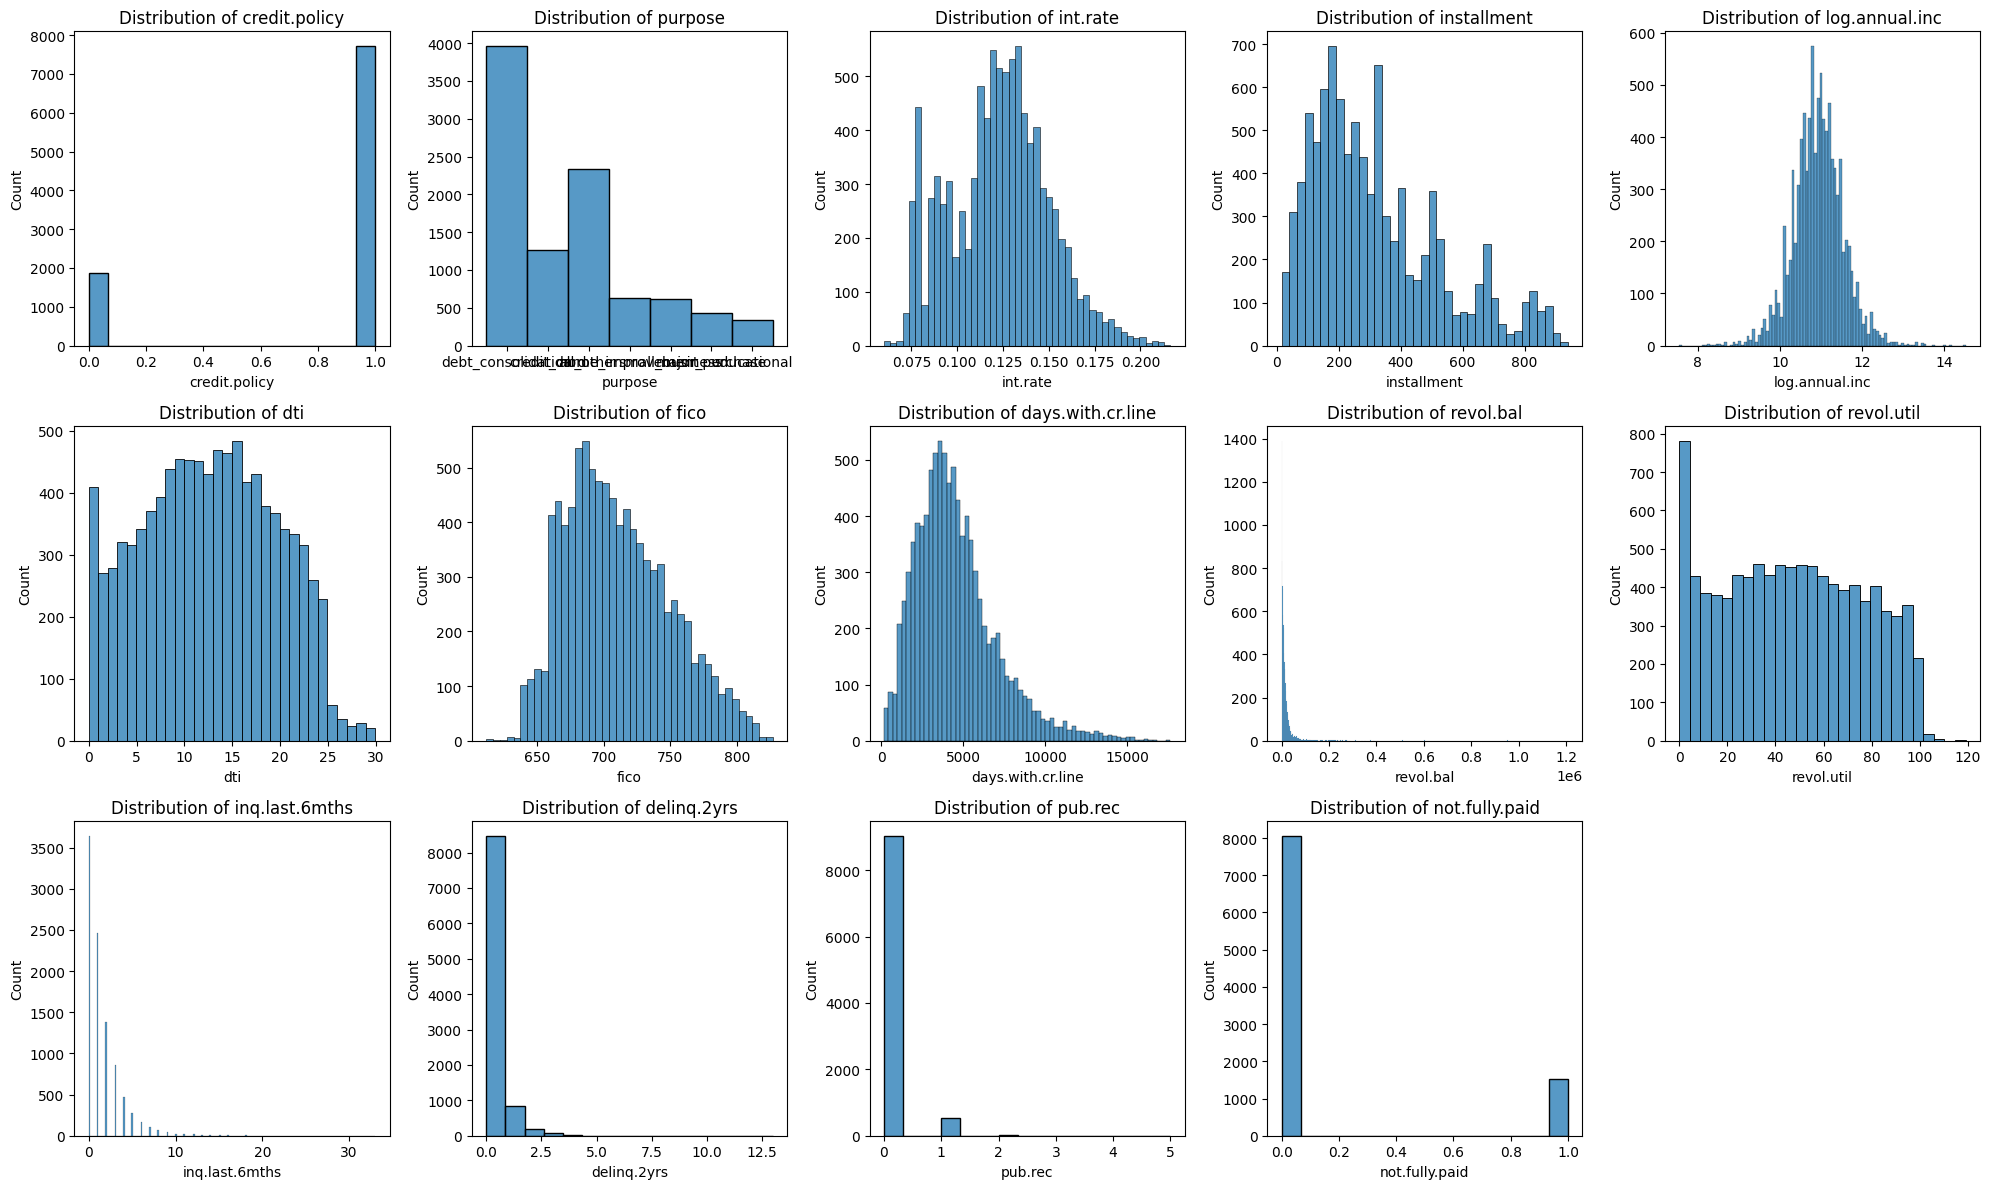

In [30]:
plot_histograms(data)

Text(0.5, 1.0, 'Histogram of FICO Distribution Based on Credit Policy')

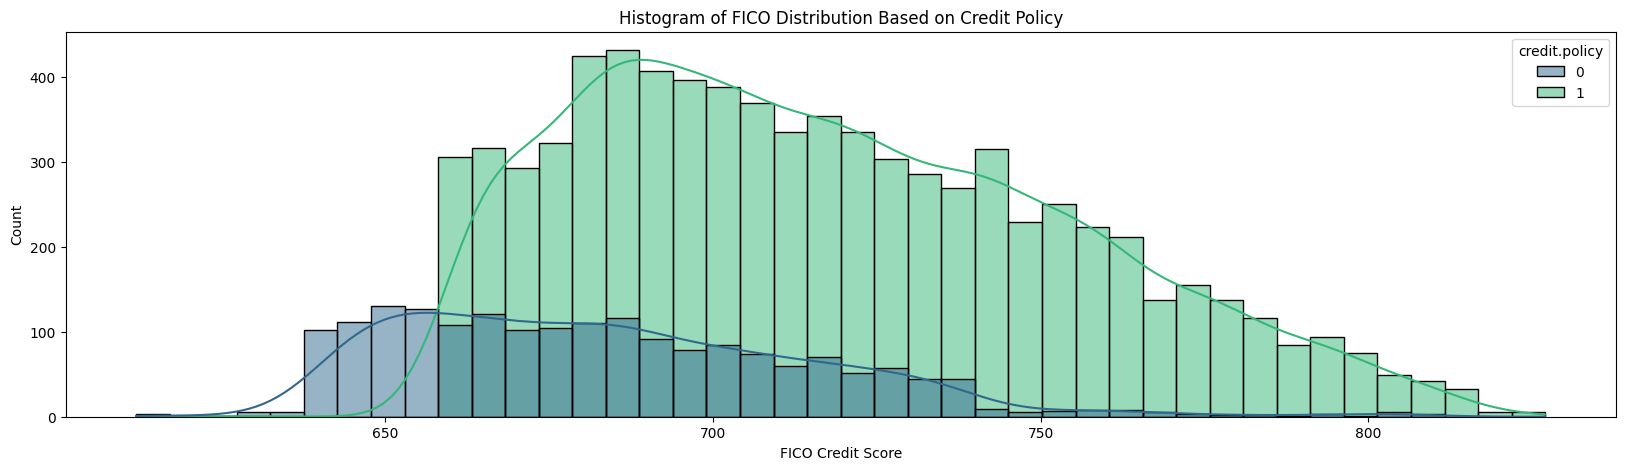

In [31]:
plt.figure(figsize=(20,5))
sns.histplot(data, x=data['fico'], hue='credit.policy', palette='viridis', kde=True)
plt.xlabel('FICO Credit Score')
plt.tight_layout
plt.title('Histogram of FICO Distribution Based on Credit Policy')

Text(0.5, 1.0, 'Histogram of FICO Distribution Based on "not.fully.paid"')

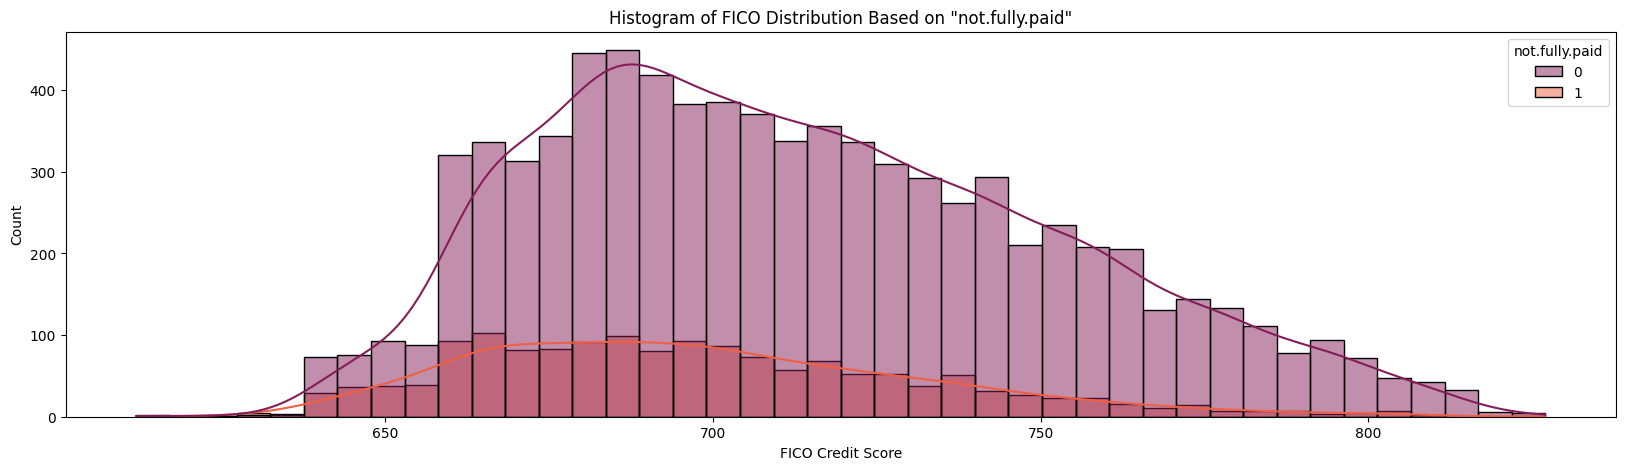

In [32]:
plt.figure(figsize=(20,5))
sns.histplot(data, x=data['fico'], hue='not.fully.paid', palette='rocket', kde=True)
plt.xlabel('FICO Credit Score')
plt.tight_layout
plt.title('Histogram of FICO Distribution Based on "not.fully.paid"')

<Axes: xlabel='purpose', ylabel='count'>

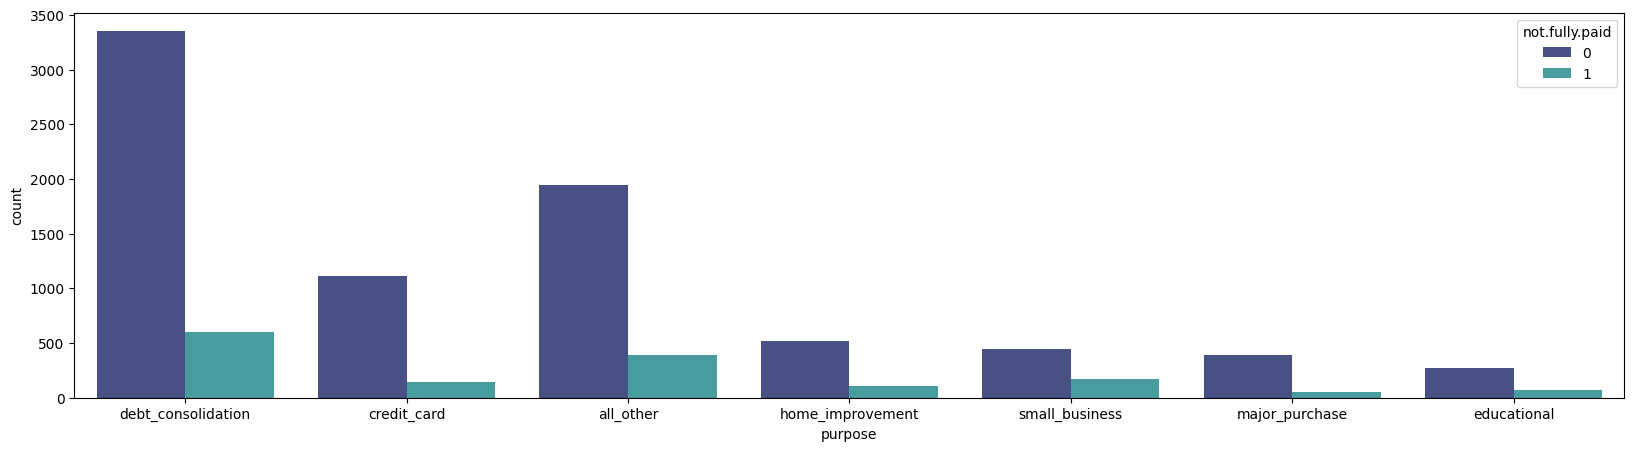

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(data, x='purpose', hue='not.fully.paid',palette='mako')

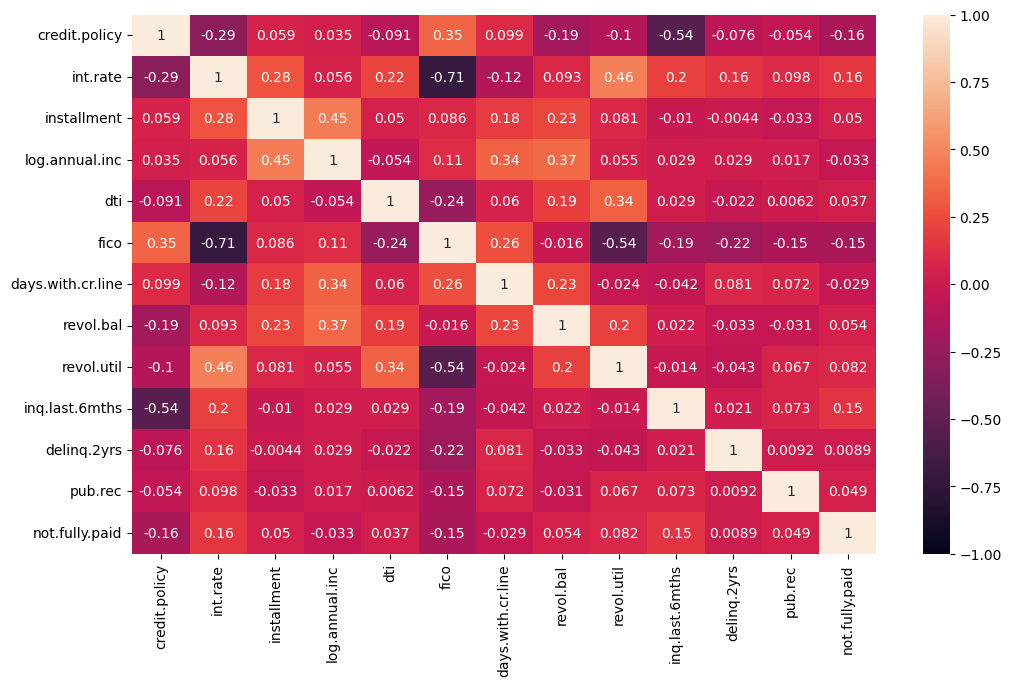

In [34]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['purpose'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h3 align="left"><font color=#4D869C>Inferences:</font></h3>
    
* According to the correlation diagram, there is a relative linear relationship between most of the data features.

* The comparison between `fico` and `credit.policy` shows that a higher percentage of people in the data set have been identified as eligible for loans compared to the FICO score.

* The comparison of `not.fully.paid` and `fico` score shows that the distribution of both graphs is the same with a smaller volume, so that a relatively small percentage of people have not paid their loans.

* The graph of the `purpose` of loan payment shows that the most loans were for debt consolidation and the least number of loans were for education.


<a id="preprocessing"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 4 | Data Preprocessing</p>
⬆️ [Tabel of Contents](#contents_tabel)

# <b><span style='color:#CDE8E5'>Step 4.1 |</span><span style='color:#4D869C'> Label Encoder:</span></b>

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['purpose'] = le.fit_transform(data['purpose'])
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# <b><span style='color:#CDE8E5'>Step 4.2 |</span><span style='color:#4D869C'> Normalize features</span></b>

In [36]:
def normal_dis(data, feature:str):
  # create new column
  data[feature] = np.sqrt(data[feature])

  # visualize
  sns.histplot(x=data[feature], label=data[feature].name, kde =True)
  plt.legend()
  plt.title(f'Distribution of {data[feature].name}')
  plt.show()

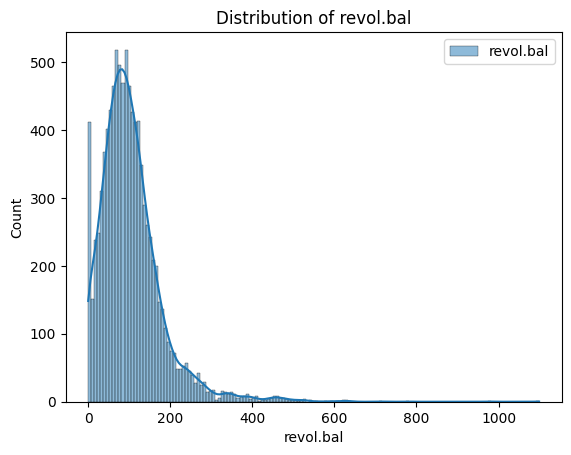

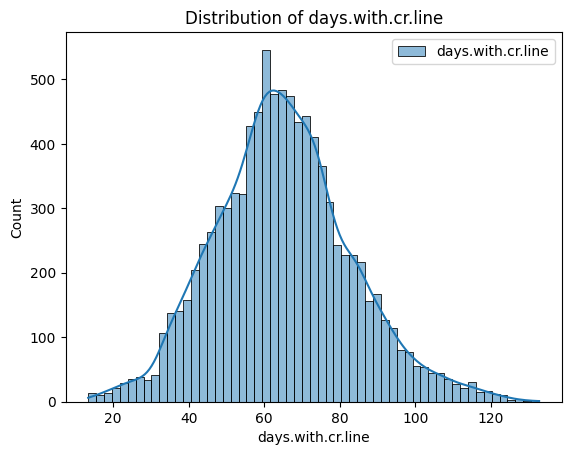

In [37]:
unnormal_features = ["revol.bal", "days.with.cr.line"]
for i in unnormal_features:
  normal_dis(data, i)

In [38]:
fico_labels = range(1,5)
fico = pd.qcut(data["fico"], q=4, labels=fico_labels)
data["fico"] = fico


revol_util_labels = range(1,5)
revol_util = pd.qcut(data["revol.util"], q=4, labels=revol_util_labels)
data["revol.util"] = revol_util


inq_last_6mths_labels = range(1,5)
inq_last_6mths = pd.cut(data["inq.last.6mths"], bins=4, labels= inq_last_6mths_labels)
data["inq.last.6mths"] = inq_last_6mths


delinq_2yrs_labels = range(1,5)
delinq_2yrs = pd.cut(data["delinq.2yrs"], bins=4, labels= delinq_2yrs_labels)
data["delinq.2yrs"] = delinq_2yrs


pub_rec_labels = range(1,5)
pub_rec = pd.cut(data["pub.rec"], bins=4, labels= pub_rec_labels)
data["pub.rec"] = pub_rec

In [39]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,3,75.099656,169.864652,3,1,1,1,0
1,1,1,0.1071,228.22,11.082143,14.29,2,52.535702,183.365755,4,1,1,1,0
2,1,2,0.1357,366.86,10.373491,11.63,1,68.629440,59.253692,2,1,1,1,0
3,1,2,0.1008,162.34,11.350407,8.10,3,51.961123,183.485694,4,1,1,1,0
4,1,1,0.1426,102.92,11.299732,14.97,1,63.765194,68.847658,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,1,102.342562,464.081889,4,1,1,1,1
9574,0,0,0.1253,257.70,11.141862,0.21,3,66.181568,13.564660,1,1,1,1,1
9575,0,2,0.1071,97.81,10.596635,13.09,2,58.737055,100.179838,4,1,1,1,1
9576,0,4,0.1600,351.58,10.819778,19.18,2,42.426407,0.000000,1,1,1,1,1


# <b><span style='color:#CDE8E5'>Step 4.3 |</span><span style='color:#4D869C'> Treating Imbalanced data</span></b>


In [40]:
#create two different dataframe of majority and minority class
df_majority = data[(data['not.fully.paid']==0)]
df_minority = data[(data['not.fully.paid']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 8045, # to match majority class
                                 random_state=60)  # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [41]:
data_upsampled

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1263,1,0,0.1001,216.23,10.596635,5.13,3,79.372539,65.000000,2,1,1,1,1
7948,0,2,0.1091,326.97,11.225243,8.00,1,46.796991,34.205263,3,1,1,1,1
9087,0,0,0.1316,168.86,10.684646,14.15,1,73.280284,207.545176,3,1,1,1,1
2682,1,2,0.1347,101.77,11.097410,14.60,2,77.323724,122.853571,4,1,1,1,1
596,1,2,0.1387,341.15,10.474467,13.19,1,63.639610,109.402925,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9561,0,0,0.0788,115.74,10.999095,10.17,3,66.407831,107.638283,3,1,1,1,0
9562,0,2,0.1348,508.87,10.933107,17.76,3,62.209659,93.594872,2,1,1,1,0
9564,0,0,0.1385,511.56,12.323856,12.33,2,80.125163,620.877605,3,1,1,1,0
9567,0,0,0.1311,101.24,10.968198,8.23,2,52.820845,38.910153,1,1,1,1,0


# <b><span style='color:#CDE8E5'>Step 4.4 |</span><span style='color:#4D869C'> Feature Scaling:</span></b>

In [42]:
X = data_upsampled.iloc[:, :-1].values
y = data_upsampled.iloc[:, -1].values
print(X)
print("==================================")
print(y)

[[1.     0.     0.1001 ... 1.     1.     1.    ]
 [0.     2.     0.1091 ... 1.     1.     1.    ]
 [0.     0.     0.1316 ... 1.     1.     1.    ]
 ...
 [0.     0.     0.1385 ... 1.     1.     1.    ]
 [0.     0.     0.1311 ... 1.     1.     1.    ]
 [0.     0.     0.1979 ... 1.     1.     1.    ]]
[1 1 1 ... 0 0 0]


In [43]:
ss = StandardScaler()
X = ss.fit_transform(X)

# <b><span style='color:#CDE8E5'>Step 4.5 |</span><span style='color:#4D869C'> Split the Dataset:</span></b>

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state =100)

<a id="modeling"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 5 | Model Selection</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h3 align="left"><font color=#4D869C>Machine learning VS deep learning:</font></h3>
    
Machine learning models are suitable for simpler, smaller-scale tasks with structured data and require significant feature engineering. Deep learning models excel in handling large, complex datasets, often with unstructured data, and automate feature extraction, though they demand more resources and training time.
    
### Machine Learning Models

1. **Types of Models**:
   - **Supervised**: Linear regression, decision trees, SVM, random forests.
   - **Unsupervised**: K-means clustering, PCA.
   - **Reinforcement**: Q-learning.

2. **Data Requirements**:
   - Require structured data.
   - Perform well with smaller datasets.

3. **Feature Engineering**:
   - Significant manual effort required.
   - Domain knowledge often necessary.

4. **Training Time**:
   - Generally faster to train.
   - Easier to interpret and debug.

5. **Applications**:
   - Predictive modeling, classification, regression tasks.

### Deep Learning Models

1. **Types of Models**:
   - **Neural Networks**: CNNs, RNNs, LSTMs, Transformers.

2. **Data Requirements**:
   - Require large amounts of data.
   - Can handle unstructured data (images, text).

3. **Feature Engineering**:
   - Minimal manual effort required.
   - Automatically extracts features.

4. **Training Time**:
   - Often require more time and computational resources.
   - Complex and harder to interpret.

5. **Applications**:
   - Image and speech recognition, natural language processing, complex pattern recognition.



<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h3 align="left"><font color=#4D869C>F1 score:</font></h3>


The F1 score is a metric used to evaluate the performance of a classification model, especially in situations where the data is imbalanced (i.e., one class is much more common than the other). It is the harmonic mean of precision and recall, providing a single score that balances both concerns.

#### Key Metrics:
1. **Precision**: This measures the accuracy of the positive predictions made by the model. It is defined as the ratio of true positive predictions to the total number of positive predictions (true positives + false positives).

   $
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   $

   Precision answers the question: "Of all the instances that were predicted as positive, how many were actually positive?"

2. **Recall (Sensitivity)**: This measures the ability of the model to find all the positive instances in the dataset. It is defined as the ratio of true positive predictions to the total number of actual positives (true positives + false negatives).

   $
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   $

   Recall answers the question: "Of all the actual positive instances, how many were correctly predicted as positive?"

#### F1 Score Calculation:
The F1 score combines precision and recall into a single metric by calculating their harmonic mean. The harmonic mean is used instead of the arithmetic mean because it punishes extreme values more, providing a more balanced metric when there is a trade-off between precision and recall.
   
   $
   \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $

#### Why Use the F1 Score?
- **Balance**: The F1 score provides a balance between precision and recall, making it useful when you need to consider both false positives and false negatives.
- **Imbalanced Data**: It is particularly useful in imbalanced datasets where one class is significantly underrepresented. Accuracy alone might be misleading in such cases.



# <b><span style='color:#CDE8E5'>Step 5.1 |</span><span style='color:#4D869C'> Logistic Regression:</span></b>

In [45]:
lg_model = LogisticRegression(C=0.01)
lg_model.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [46]:
y_predict_test = lg_model.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1580
           1       0.62      0.58      0.60      1638

    accuracy                           0.60      3218
   macro avg       0.60      0.60      0.60      3218
weighted avg       0.60      0.60      0.60      3218



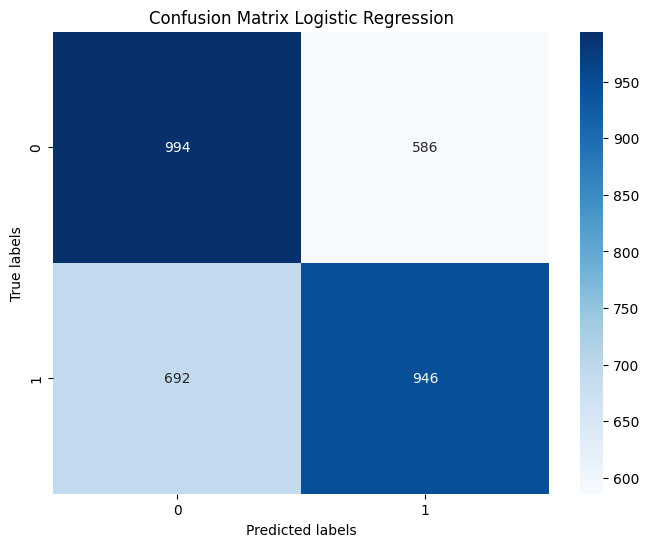

In [47]:
conf_matrix = confusion_matrix(y_test, y_predict_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

# <b><span style='color:#CDE8E5'>Step 5.2 |</span><span style='color:#4D869C'> Decision Trees:</span></b>

In [48]:
parameters = {'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'max_depth':[6, 8, 10, 15],
              'min_samples_split':[2, 4, 6, 8]}

model = DecisionTreeClassifier()
model_selection = RandomizedSearchCV(model, parameters, cv=3)
model_selection.fit(X, y)

model_selection.best_params_

{'splitter': 'random',
 'min_samples_split': 2,
 'max_depth': 15,
 'criterion': 'entropy'}

In [49]:
dtree_model = DecisionTreeClassifier(criterion ='gini', splitter='random', max_depth=15, min_samples_split=2)
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15, splitter='random')

In [50]:
y_predict_test = dtree_model.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1580
           1       0.74      0.89      0.81      1638

    accuracy                           0.78      3218
   macro avg       0.80      0.78      0.78      3218
weighted avg       0.79      0.78      0.78      3218



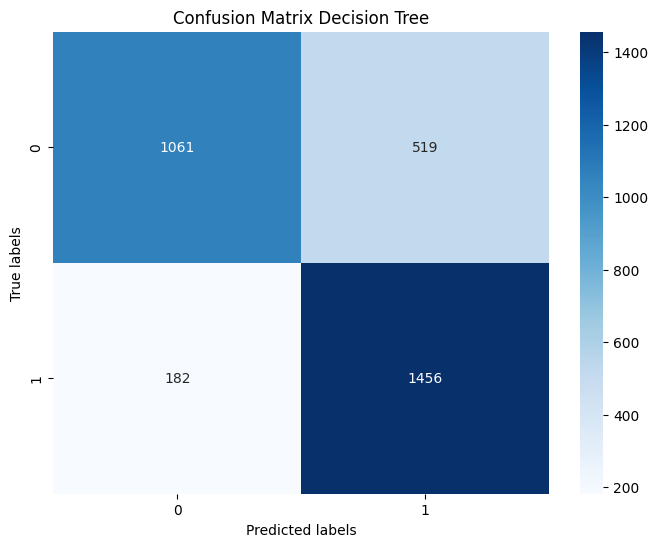

In [51]:
conf_matrix = confusion_matrix(y_test, y_predict_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Decision Tree')
plt.show()

# <b><span style='color:#CDE8E5'>Step 5.3 |</span><span style='color:#4D869C'> Random Forest:</span></b>

In [52]:
parameters = {
    'n_estimators':[100, 300, 500],
    'max_depth':[6, 8, 10],
    'min_samples_split':[6, 8, 10]}

model = RandomForestClassifier()
model_selection = RandomizedSearchCV(model, parameters, cv=3)
model_selection.fit(X, y)

model_selection.best_params_

{'n_estimators': 300, 'min_samples_split': 6, 'max_depth': 10}

In [53]:
random_forest_model = RandomForestClassifier(n_estimators = 300, min_samples_split=6, max_depth=10, bootstrap=True , oob_score=True)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=300,
                       oob_score=True)

In [54]:
y_predict_test = random_forest_model.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1580
           1       0.75      0.75      0.75      1638

    accuracy                           0.75      3218
   macro avg       0.75      0.75      0.75      3218
weighted avg       0.75      0.75      0.75      3218



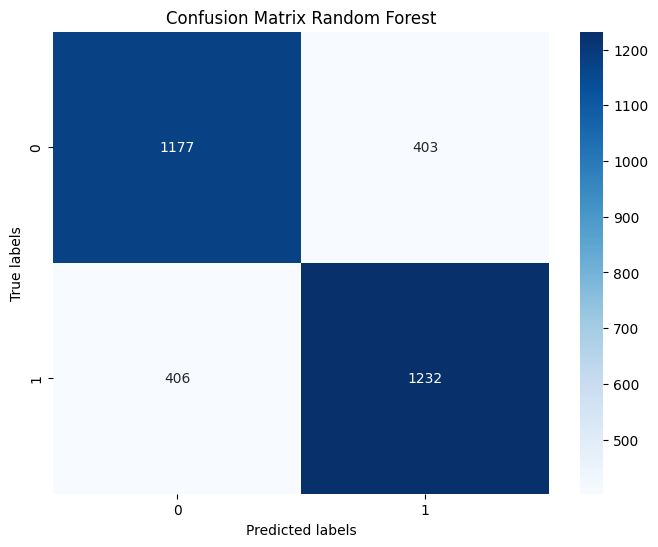

In [55]:
conf_matrix = confusion_matrix(y_test, y_predict_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

# <b><span style='color:#CDE8E5'>Step 5.4 |</span><span style='color:#4D869C'> Support Vector Machines:</span></b>

In [56]:
parameters = {'C':[0.1 , 5, 10],
              'kernel':['linear', 'rbf']}
model = SVC()
model_selection = RandomizedSearchCV(model, parameters, cv=3)
model_selection.fit(X, y)

model_selection.best_params_

{'kernel': 'rbf', 'C': 10}

In [57]:
svm_model = SVC(random_state=3432, C=10, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, random_state=3432)

In [58]:
y_predict_test = svm_model.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1580
           1       0.71      0.68      0.69      1638

    accuracy                           0.69      3218
   macro avg       0.69      0.69      0.69      3218
weighted avg       0.69      0.69      0.69      3218



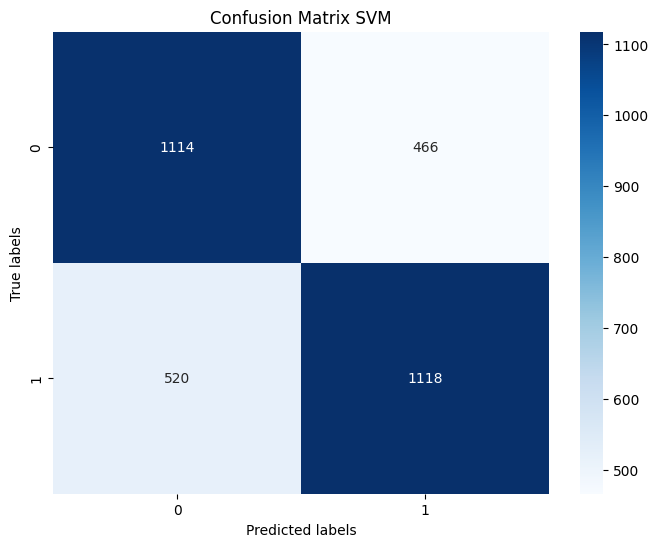

In [59]:
conf_matrix = confusion_matrix(y_test, y_predict_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM')
plt.show()

# <b><span style='color:#CDE8E5'>Step 5.5 |</span><span style='color:#4D869C'> XGboost:</span></b>

In [60]:
parameters = {'n_estimators':[75, 100],
              'learning_rate':[0.1, 0.01]}
model = XGBClassifier()
model_selection = RandomizedSearchCV(model, parameters, cv=3)
model_selection.fit(X, y)

model_selection.best_params_

{'n_estimators': 100, 'learning_rate': 0.1}

In [61]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.75, max_depth=7)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
y_predict_test = xgb_model.predict(X_test)

print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1580
           1       0.83      0.90      0.86      1638

    accuracy                           0.85      3218
   macro avg       0.86      0.85      0.85      3218
weighted avg       0.85      0.85      0.85      3218



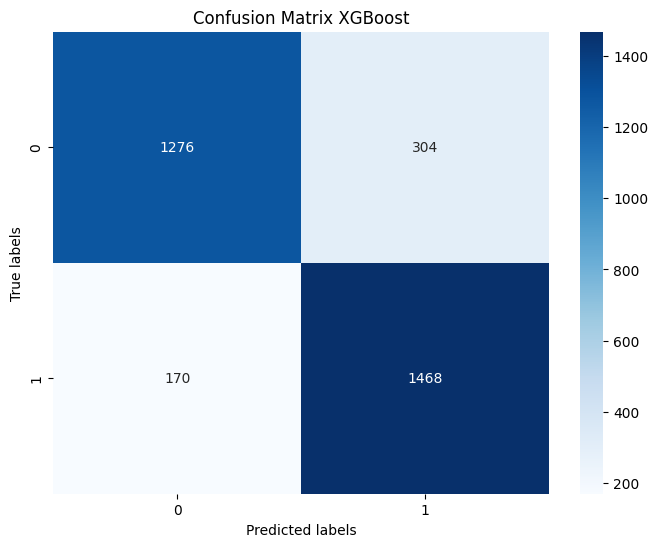

In [63]:
conf_matrix = confusion_matrix(y_test, y_predict_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost')
plt.show()

# <b><span style='color:#CDE8E5'>Step 5.6 |</span><span style='color:#4D869C'> Fully Connected Neural Networks:</span></b>

In [64]:
y = to_categorical(y , num_classes=2)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state =100)

In [66]:
# Define the model
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=X_train.shape[1:]),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(2, activation="sigmoid"),
    ]
)

In [67]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8

In [69]:
#plot_model(model, show_layer_activations=True, show_shapes=True)

In [70]:
# Train the model
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/100
101/101 [==============================] - 2s 9ms/step - loss: 0.6550 - categorical_accuracy: 0.6034 - val_loss: 0.6426 - val_categorical_accuracy: 0.6305
Epoch 2/100
101/101 [==============================] - 1s 6ms/step - loss: 0.6397 - categorical_accuracy: 0.6363 - val_loss: 0.6372 - val_categorical_accuracy: 0.6361
Epoch 3/100
101/101 [==============================] - 1s 6ms/step - loss: 0.6312 - categorical_accuracy: 0.6439 - val_loss: 0.6376 - val_categorical_accuracy: 0.6293
Epoch 4/100
101/101 [==============================] - 1s 6ms/step - loss: 0.6284 - categorical_accuracy: 0.6483 - val_loss: 0.6330 - val_categorical_accuracy: 0.6395
Epoch 5/100
101/101 [==============================] - 1s 6ms/step - loss: 0.6176 - categorical_accuracy: 0.6614 - val_loss: 0.6238 - val_categorical_accuracy: 0.6448
Epoch 6/100
101/101 [==============================] - 1s 10ms/step - loss: 0.6104 - categorical_accuracy: 0.6687 - val_loss: 0.6209 - val_categorical_accuracy: 0.65

In [71]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

101/101 [==============================] - 0s 2ms/step - loss: 0.3648 - categorical_accuracy: 0.8863
Loss: 0.3648032248020172, Accuracy: 0.8862647414207458


In [72]:
# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true, y_pred_classes)
print(report)

101/101 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1580
           1       0.84      0.96      0.90      1638

    accuracy                           0.89      3218
   macro avg       0.90      0.88      0.89      3218
weighted avg       0.89      0.89      0.89      3218



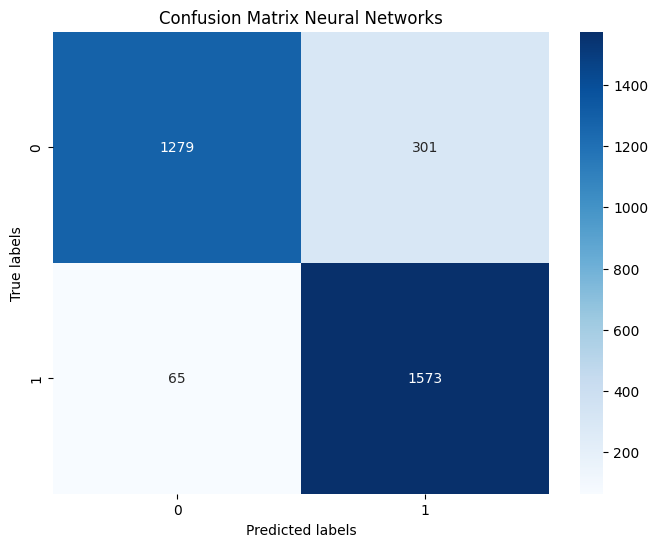

In [73]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Neural Networks')
plt.show()

<a id="conclusions"></a>
# <p style="background-color: #4D869C; font-family:calibri; color:white; font-size:135%; font-family:Verdana; text-align:center; border-radius:15px 50px;  padding: 15px;">Step 6 | Conclusions & Comparison models</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h3 align="left"><font color=#4D869C>Comparison models:</font></h3>
    

In this project, we explored various machine learning models to evaluate their performance on our dataset. The models investigated included Logistic regression, decision trees, random forests, support vector machines, and gradient boosting machines(XG-Boost). Additionally, we delved into deep learning techniques, specifically deep neural networks.

Our evaluation metric of choice was the F1 score, which balances precision and recall to provide a comprehensive measure of model performance, particularly in scenarios with imbalanced datasets.



| Model                    | F1-score accuracy  | F1-score macro avg | F1-score weighted avg |
| :---                     | :----:             | :----:             | :----:                |
| Logistic Regression      | 0.60               | 0.60               | 0.60                  |
| Decision Trees           | 0.76               | 0.76               | 0.76                  |
| Random Forest            | 0.76               | 0.76               | 0.76                  |
| Support Vector Machines  | 0.69               | 0.69               | 0.69                  |
| XGboost                  | 0.85               | 0.85               | 0.85                  |
| Deep Neural Networks          | 0.90               | 0.90               | 0.90                  |



<div style="border-radius:10px; padding: 15px; background-color: #CDE8E5; font-size:130%; text-align:left; color: #fffff">

<h3 align="left"><font color=#4D869C>Conclusions:</font></h3>
    

The results highlighted the strengths and weaknesses of each model. Traditional machine learning models such as XG-Boost and Random Forest have performed well due to their ability to handle complex relationships in data and inherent feature selection capabilities. Contrary to popular belief, support vector machines also perform relatively poorly, especially with optimal kernel selection and Parameter setting.

In contrast, logistic regression and decision trees, while simple and interpretable, often poor performance due to the assumption of linear relationships, which may not fully represent the complexity of the data.

On the deep learning front, neural networks have shown significant potential, especially when dealing with large datasets and complex patterns. There are complex patterns in this data set that traditional machine learning models cannot learn on this data. However, the deep neural network obtained the best F1 score compared to the other model.

Overall, this comprehensive evaluation provided valuable insights into the relative performance of different machine learning and deep learning models.

In [74]:
# end